In [1]:
from google.colab import files


uploaded = files.upload()

Saving compactiv.xlsx to compactiv.xlsx


In [2]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file into a DataFrame
df = pd.read_excel('compactiv.xlsx')

# Check Shape, Data Types, Statistical Summary
print(df.head())

# Get basic statistics about the data
print("Dataset Shape:")
print(df.shape)

print("\nData Types:")
print(df.dtypes)

print("\nStatistical Summary:")
print(df.describe())

   lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  10212

There are a total of 8192 rows and 22 columns in the dataset. Out of 22, 13 are float 8 are integertype and 1 object type variable #We have 8192 rows and 22 columns in our Data-set.


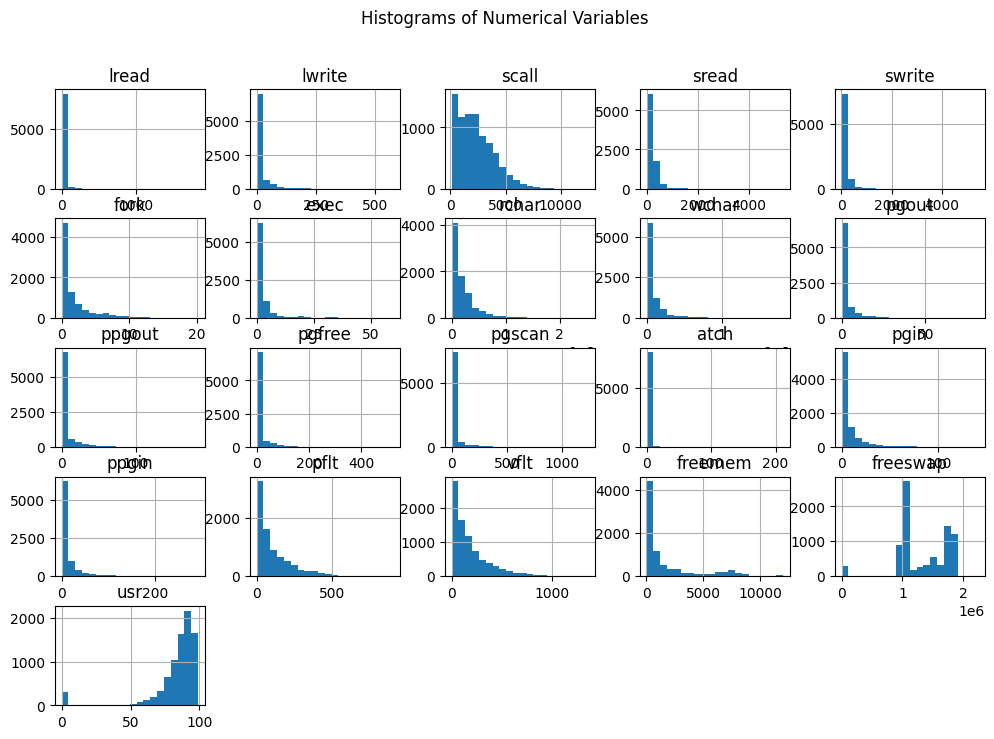

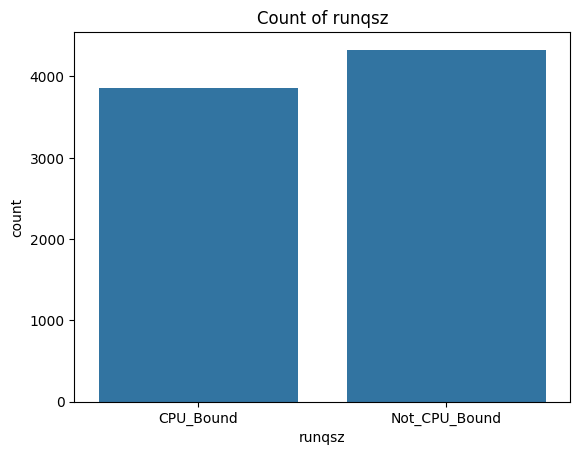

In [ ]:
# 2. Univariate Analysis
# Numerical Variables
df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms of Numerical Variables")
plt.show()

# Categorical Variables
for column in df.select_dtypes(include='object'):
    sns.countplot(x=column, data=df)
    plt.title(f"Count of {column}")
    plt.show()

From the analysis we can say we have total ‘Process run queue size’3861 as CPU_Bound and 4331 asNot_ CPU_Bound.


<ipython-input-5-0a76485ab931>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


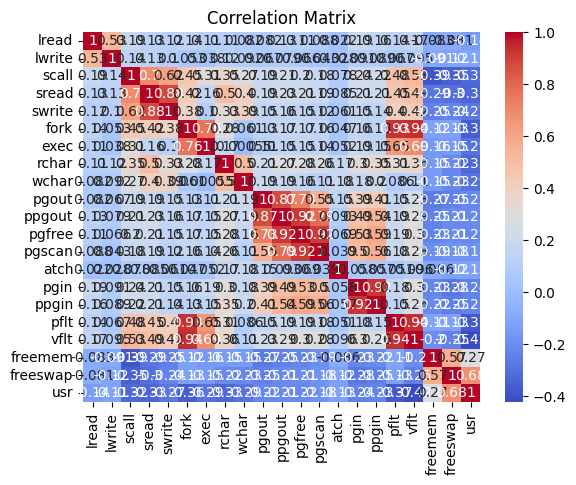

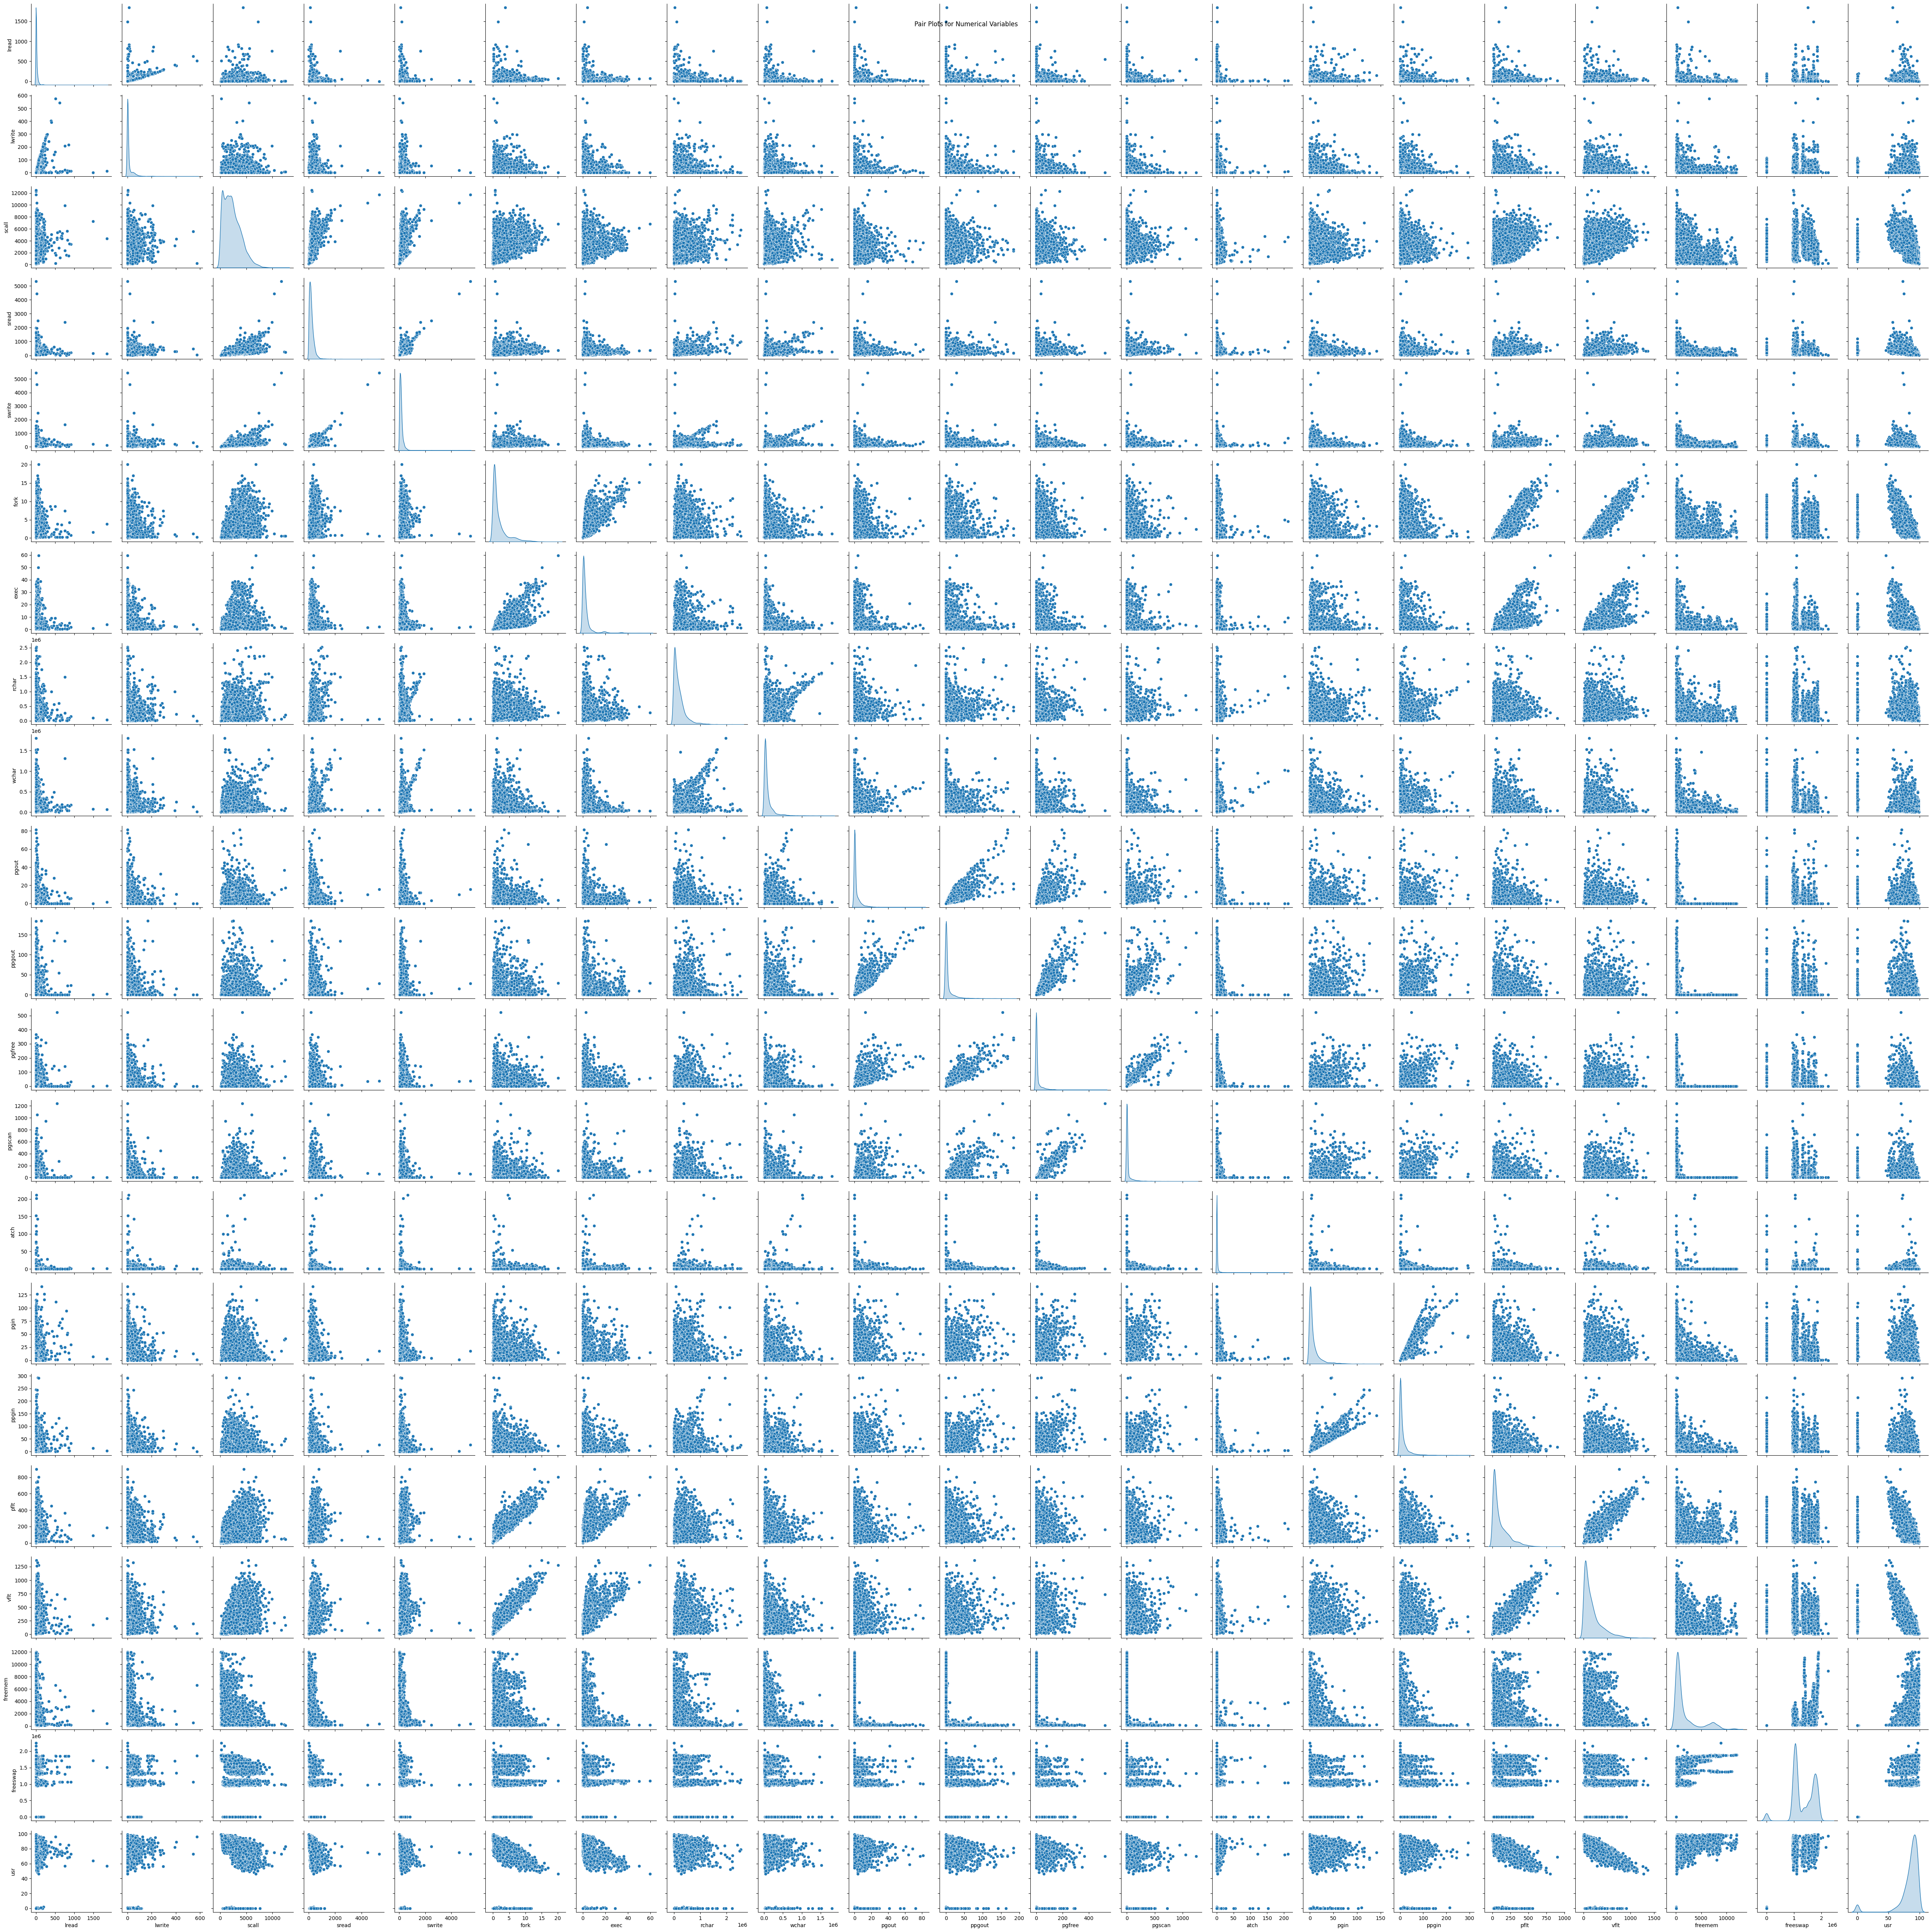

In [ ]:
# 3. Multivariate Analysis
# Correlation Matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Pair Plots for numerical variables
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pair Plots for Numerical Variables")
plt.show()

From the analysis we can see the presence of correlations.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest  # For outlier detection

In [ ]:
# 1. Missing Value Treatment
# Check for missing values
print("Missing Values Before Treatment:")
print(df.isnull().sum())

Missing Values Before Treatment:
lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64


In [ ]:
# Identify numerical and categorical columns
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# 1. Missing Value Treatment for Numerical Columns
imputer_numeric = SimpleImputer(strategy='mean')
df_imputed_numeric = pd.DataFrame(imputer_numeric.fit_transform(df[numerical_columns]), columns=numerical_columns)

# 2. Missing Value Treatment for Categorical Columns (e.g., replace with most frequent value)
imputer_categorical = SimpleImputer(strategy='most_frequent')
df_imputed_categorical = pd.DataFrame(imputer_categorical.fit_transform(df[categorical_columns]), columns=categorical_columns)

# Concatenate the imputed numerical and categorical dataframes
df_imputed = pd.concat([df_imputed_numeric, df_imputed_categorical], axis=1)

# Check again after treatment
print("\nMissing Values After Treatment:")
print(df_imputed.isnull().sum())


Missing Values After Treatment:
lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
freemem     0
freeswap    0
usr         0
runqsz      0
dtype: int64


From the Univariate analysis we can clearly see that outliers are present in the data-set, so we need totreat those outliers

In [ ]:
dups= df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [lread, lwrite, scall, sread, swrite, fork, exec, rchar, wchar, pgout, ppgout, pgfree, pgscan, atch, pgin, ppgin, pflt, vflt, runqsz, freemem, freeswap, usr]
Index: []

[0 rows x 22 columns]

In [ ]:
# To Check for null values in the dataset
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [ ]:
# Drop the columns is having more than 50% values is having 0
df.drop(['pgout','ppgout','pgfree','pgscan','atch'], axis=1, inplace=True)
df.head()


lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgin  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0   1.6   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0   0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0   6.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0   0.2   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0   1.0   

   ppgin    pflt    vflt         runqsz  freemem  freeswap  usr  
0    2.6   16.00   26.40      CPU_Bound     4670   1730946   95  
1    0.0   15.63   16.83  Not_CPU_Bound     7278   1869002   97  
2    9.4  150.20  220.20  Not_CPU_Bound      702   1021237   87  
3    0.2   15.60   16.80  Not_CPU_Bound     7248   1863704   98  
4    1.2   37.80   47.60  Not_CPU_Bound      633   1760253   90

In [ ]:
#Replace the 0 value into median
df.lread.replace(to_replace=0, value=df.lread.median(),inplace=True)
df.lwrite.replace(to_replace=0, value=df.lwrite.median(),inplace=True)
df.fork.replace(to_replace=0, value=df.fork.median(),inplace=True)
df.exec.replace(to_replace=0, value=df.exec.median(),inplace=True)
df.pgin.replace(to_replace=0, value=df.pgin.median(),inplace=True)
df.ppgin.replace(to_replace=0, value=df.ppgin.median(),inplace=True)
df.pflt.replace(to_replace=0, value=df.pflt.median(),inplace=True)
df.usr.replace(to_replace=0, value=df.usr.median(),inplace=True)

In [ ]:
#To print the number of rows and columns present in the dataset
print("no. of rows:",df.shape[0],"no.of columns:",df.shape[1])

no. of rows: 8192 no.of columns: 17


In [ ]:
#outlier treatmet
df_num= df.select_dtypes(include= ['float64', 'int64'])

In [ ]:
#Define a function to detect and remove outliers
def remove_outlier(col):
  sorted(col)
  Q1,Q3=np.percentile(col,[25,75])
  IQR=Q3-Q1
  lower_range= Q1-(1.5 * IQR)
  upper_range= Q3+(1.5 * IQR)
  return lower_range, upper_range

ValueError: num must be an integer with 1 <= num <= 16, not 17

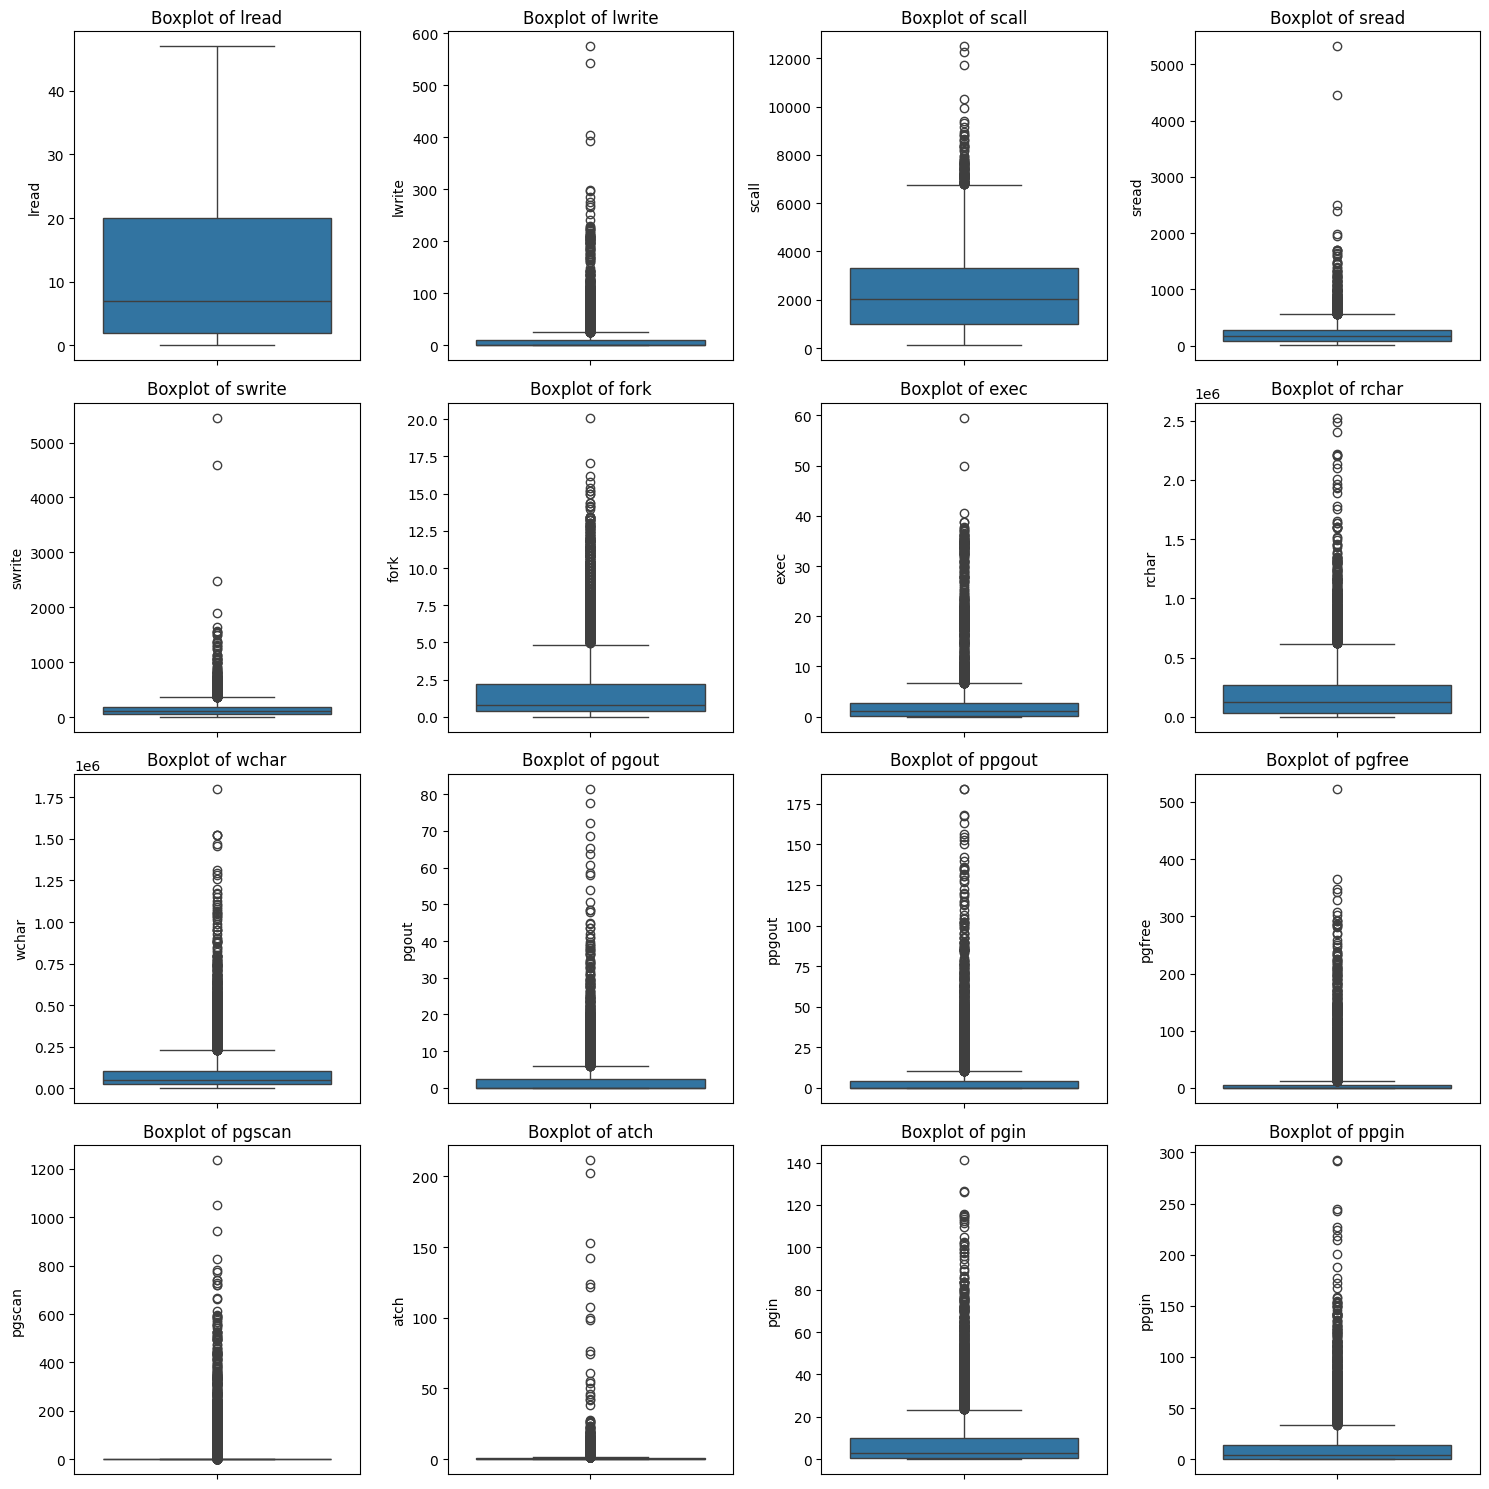

In [ ]:
# Cap & floor the values beyond the outlier boundaries
for i in feature_list:
  LL,UL= remove_outlier(df_num[i])
  df_num[i] = np.where(df_num[i] > UL,UL, df_num[i])
  df_num[i] = np.where(df_num[i] < LL,LL, df_num[i])
  # Check the box plot after treating outliers
  plt.figure(figsize=(15,15))
  feature_list= df_num.columns
  for i in range(len(feature_list)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df_num[feature_list[i]],data=df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()


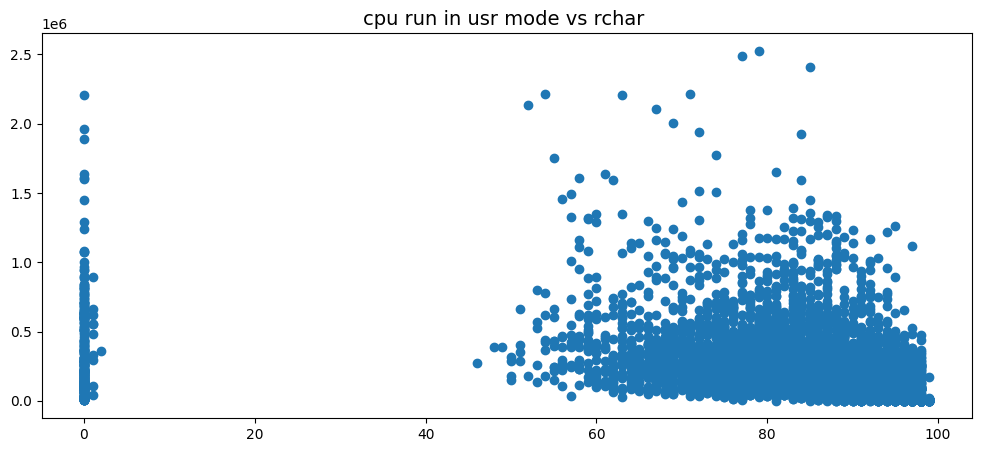

In [ ]:
#BIVARIATE ANALYSIS
# Plot the scatter plot between the usr and rchar
fig_dims=(12,5)
fig= plt.subplots(figsize=fig_dims)
plt.scatter(x='usr',y='rchar', data= df)
plt.title('cpu run in usr mode vs rchar ',fontsize=14)
plt.show();


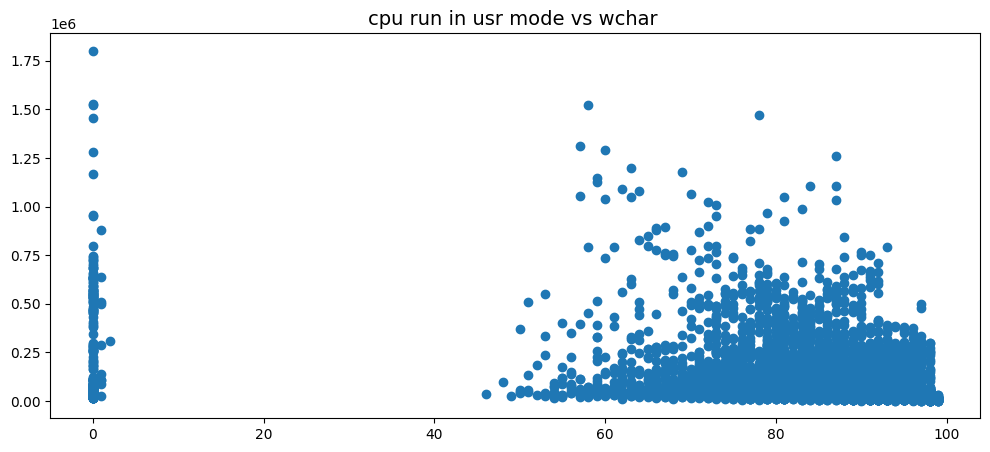

In [ ]:
# Plot the scatter plot between the usr and wchar
fig_dims=(12,5)
fig= plt.subplots(figsize=fig_dims)
plt.scatter(x='usr',y='wchar', data= df)
plt.title('cpu run in usr mode vs wchar ',fontsize=14)
plt.show();

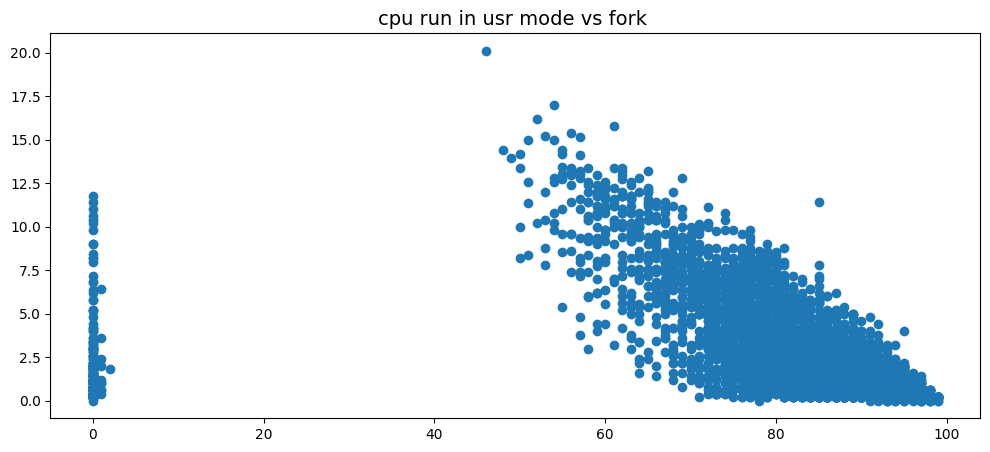

In [ ]:
# Plot the scatter plot between the usr and fork
fig_dims=(12,5)
fig= plt.subplots(figsize=fig_dims)
plt.scatter(x='usr',y='fork', data= df)
plt.title('cpu run in usr mode vs fork ',fontsize=14)
plt.show();

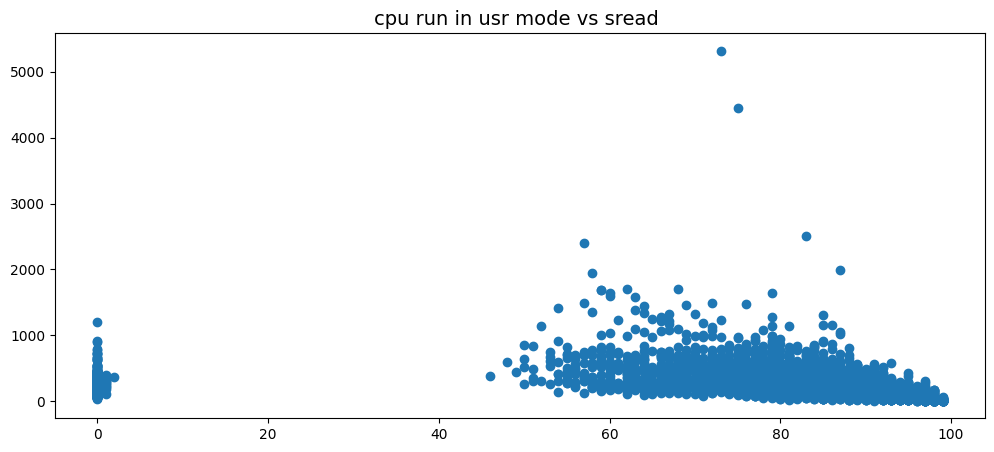

In [ ]:
# Plot the scatter plot between the usr and sread
fig_dims=(12,5)
fig= plt.subplots(figsize=fig_dims)
plt.scatter(x='usr',y='sread', data= df)
plt.title('cpu run in usr mode vs sread ',fontsize=14)
plt.show();

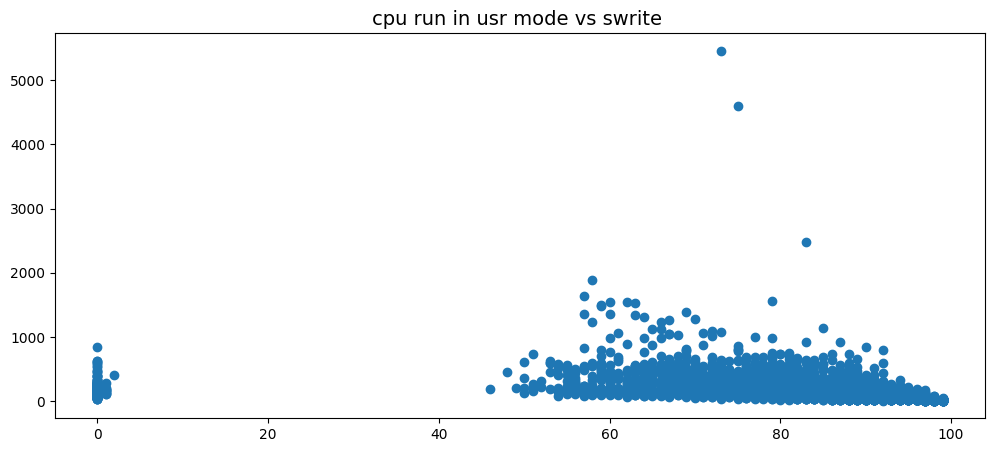

In [ ]:
# Plot the scatter plot between the usr and swrite
fig_dims=(12,5)
fig= plt.subplots(figsize=fig_dims)
plt.scatter(x='usr',y='swrite', data= df)
plt.title('cpu run in usr mode vs swrite ',fontsize=14)
plt.show()

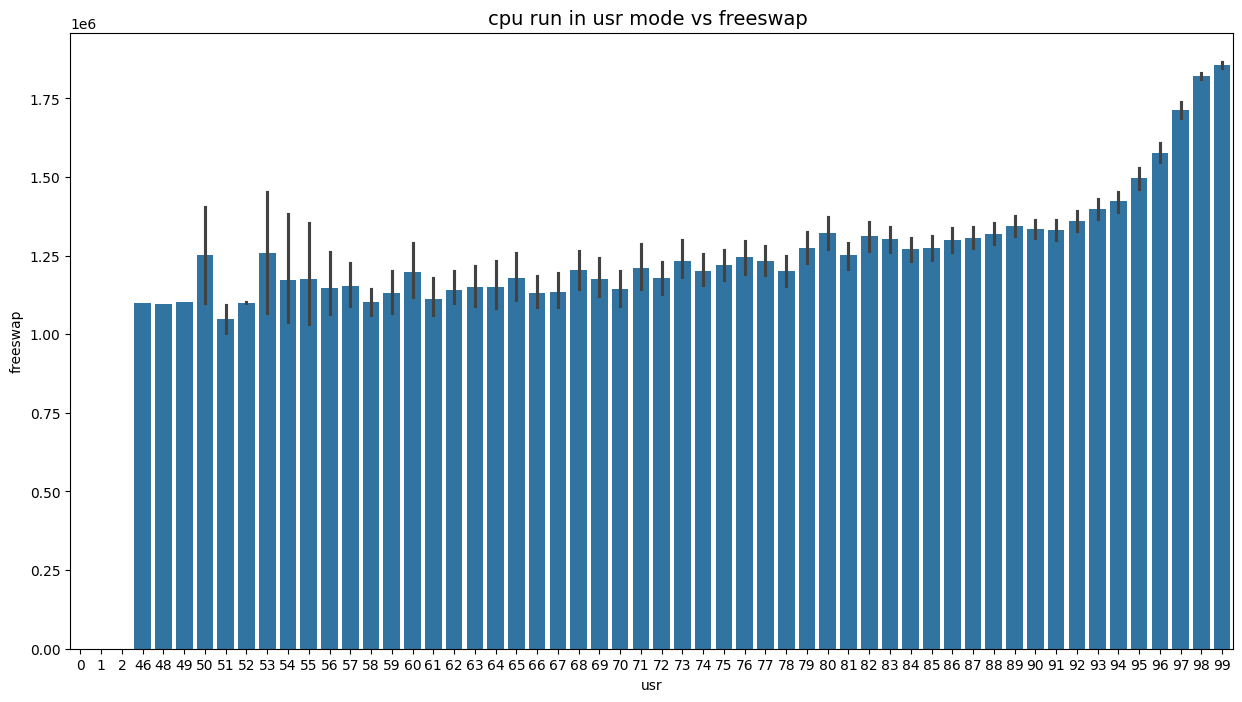

In [ ]:
# Plot the bar plot between the usr and freeswap
fig_dims=(15,8)
fig= plt.subplots(figsize=fig_dims)
sns.barplot(x='usr',y='freeswap', data= df)
plt.title('cpu run in usr mode vs freeswap ',fontsize=14)
plt.show();

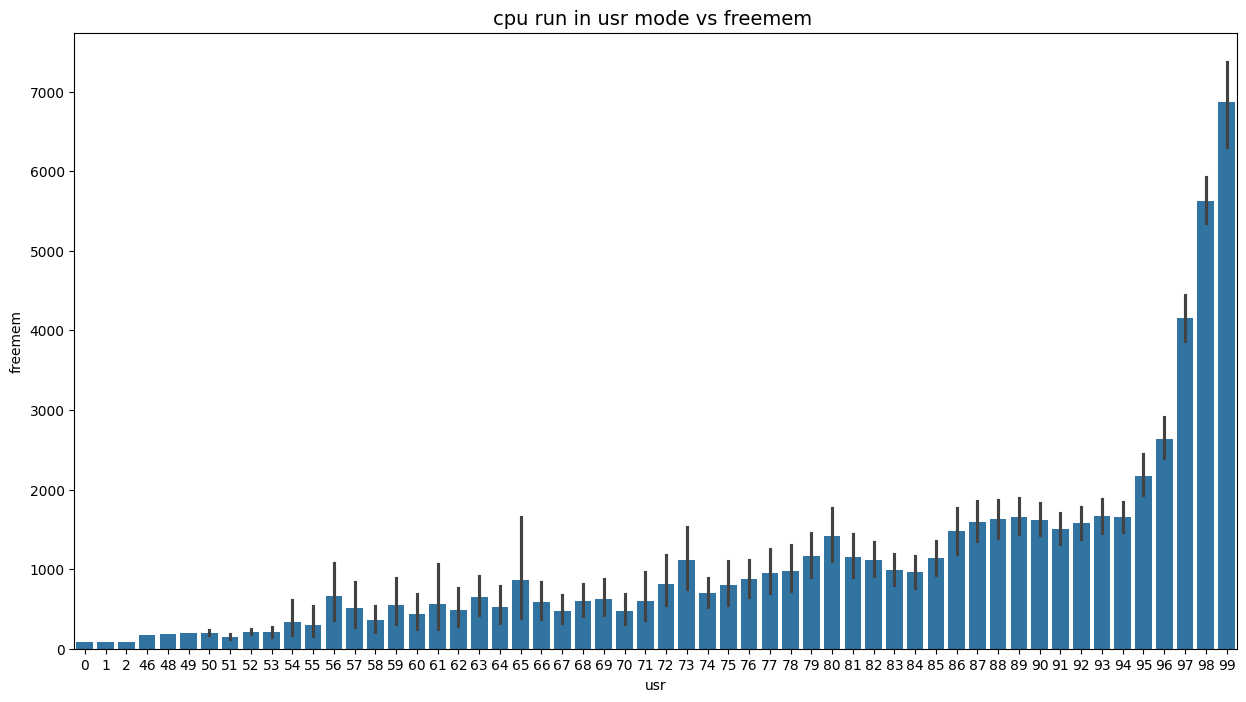

In [ ]:
# Plot the bar plot between the usr and freemem
fig_dims=(15,8)
fig= plt.subplots(figsize=fig_dims)
sns.barplot(x='usr',y='freemem', data= df)
plt.title('cpu run in usr mode vs freemem ',fontsize=14)
plt.show();

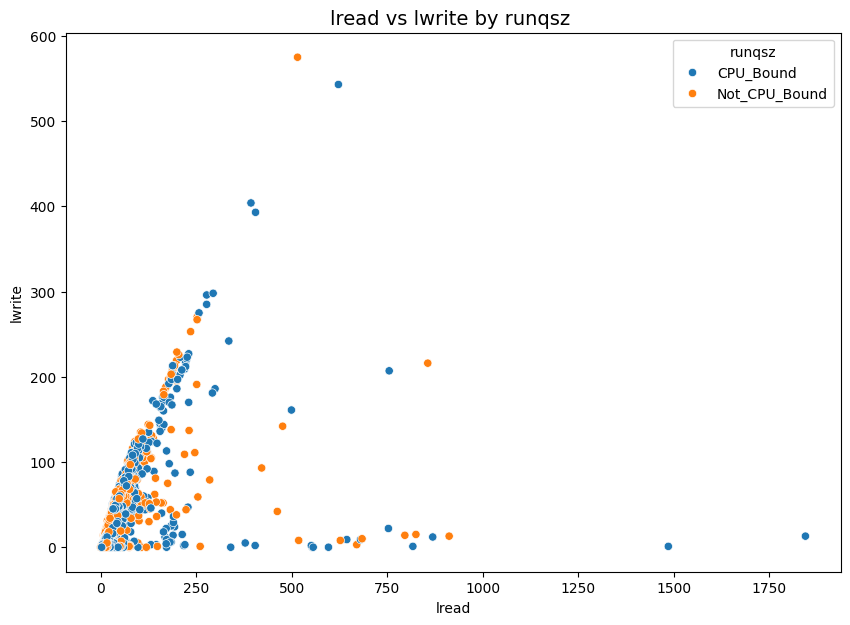

In [ ]:
# Plot the scatter plot between the lread and lwrite by runqsz
plt.figure(figsize=(10,7))
sns.scatterplot(x='lread', y= 'lwrite',data=df,hue='runqsz')
plt.title('lread vs lwrite by runqsz ',fontsize=14)
plt.show();

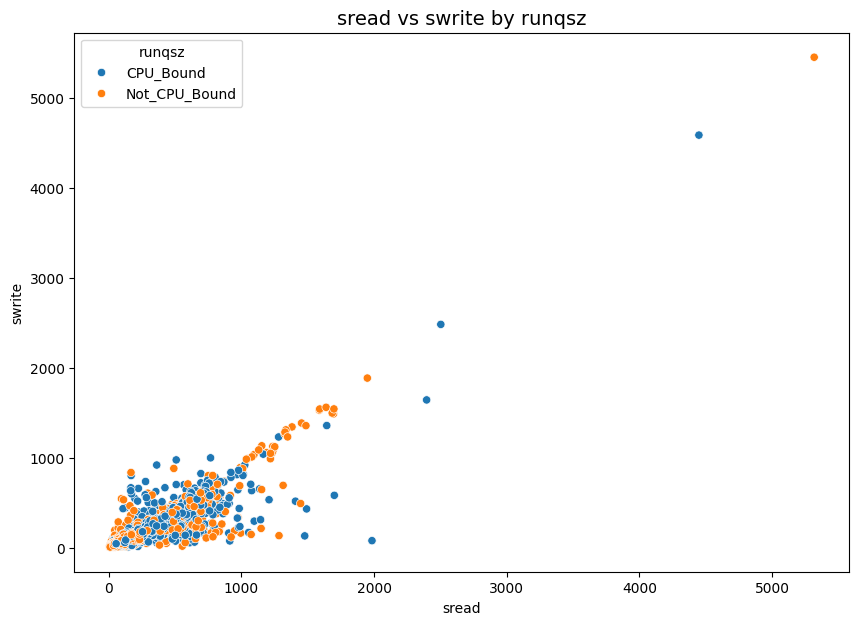

In [ ]:
# Plot the scatter plot between the sread and swrite by runqsz
plt.figure(figsize=(10,7))
sns.scatterplot(x='sread', y='swrite',data=df,hue='runqsz')
plt.title('sread vs swrite by runqsz',fontsize=14)
plt.show();


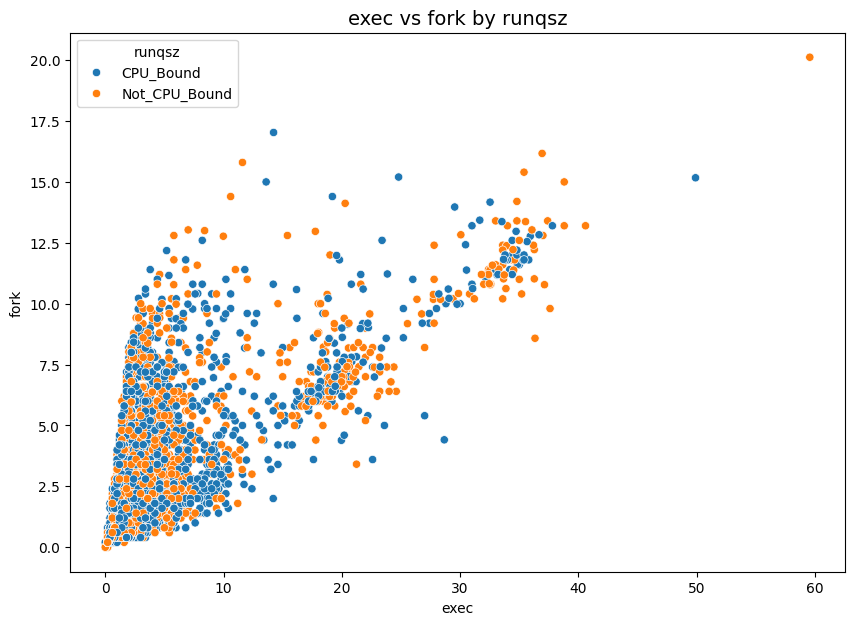

In [ ]:
# Plot the scatter plot between the exec and fork by runqsz
plt.figure(figsize=(10,7))
sns.scatterplot(x='exec', y='fork',data=df,hue='runqsz')
plt.title('exec vs fork by runqsz',fontsize=14)
plt.show();

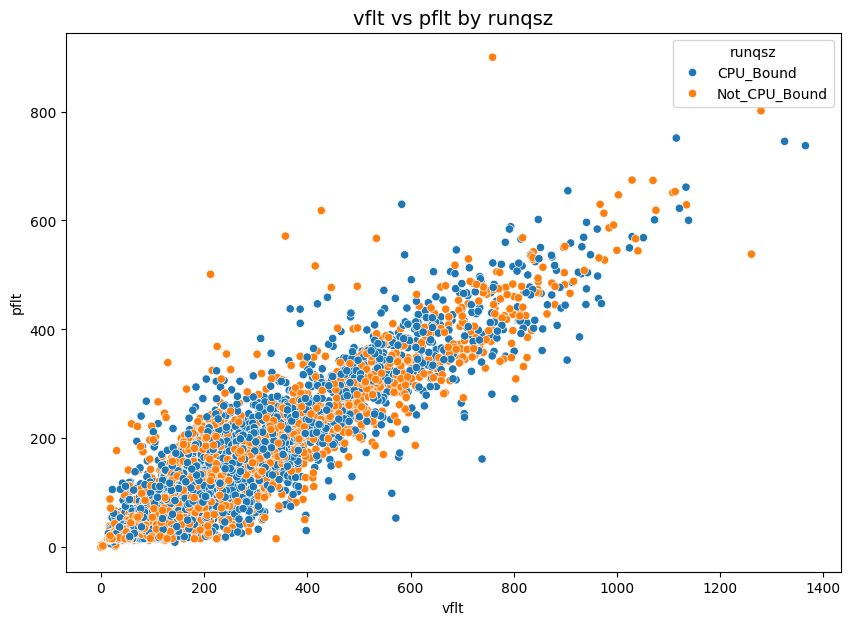

In [ ]:
# Plot the scatter plot between the vflt and pflt by runqsz
plt.figure(figsize=(10,7))
sns.scatterplot(x='vflt', y='pflt',data=df,hue='runqsz')
plt.title('vflt vs pflt by runqsz',fontsize=14)
plt.show();

In [ ]:
#MULTIVARIATE ANALYSIS
df.corr()


<ipython-input-24-a3d34e55e827>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


lread    lwrite     scall     sread    swrite      fork  \
lread     1.000000  0.533737  0.191377  0.132881  0.119953  0.140284   
lwrite    0.533737  1.000000  0.143404  0.128403  0.101524  0.052511   
scall     0.191377  0.143404  1.000000  0.696887  0.619984  0.446766   
sread     0.132881  0.128403  0.696887  1.000000  0.881069  0.416721   
swrite    0.119953  0.101524  0.619984  0.881069  1.000000  0.376876   
fork      0.140284  0.052511  0.446766  0.416721  0.376876  1.000000   
exec      0.110965  0.038237  0.308999  0.164084  0.103643  0.763974   
rchar     0.107973  0.115121  0.351413  0.502397  0.331386  0.281229   
wchar     0.081571  0.091718  0.274092  0.401784  0.394230  0.060790   
pgout     0.082463  0.067013  0.194529  0.193679  0.151371  0.130192   
ppgout    0.130590  0.079485  0.208400  0.225906  0.159442  0.166872   
pgfree    0.114438  0.065692  0.199778  0.212911  0.145458  0.168082   
pgscan    0.087783  0.042608  0.177908  0.194272  0.120180  0.160839   
atch      0.021563  0.028310  0.077969  0.085468  0.061373  0.047194   
pgin      0.189799  0.091068  0.241628  0.207012  0.147000  0.163468   
ppgin     0.161345  0.089011  0.219070  0.210225  0.144278  0.132181   
pflt      0.137463  0.067024  0.481781  0.452020  0.396580  0.931040   
vflt      0.165539  0.094965  0.531760  0.491045  0.416571  0.939348   
freemem  -0.083214 -0.091133 -0.387520 -0.286437 -0.248574 -0.123357   
freeswap -0.081293 -0.116478 -0.350629 -0.302036 -0.237062 -0.130442   
usr      -0.141394 -0.111213 -0.323188 -0.332160 -0.272252 -0.363277   

              exec     rchar     wchar     pgout  ...    pgfree    pgscan  \
lread     0.110965  0.107973  0.081571  0.082463  ...  0.114438  0.087783   
lwrite    0.038237  0.115121  0.091718  0.067013  ...  0.065692  0.042608   
scall     0.308999  0.351413  0.274092  0.194529  ...  0.199778  0.177908   
sread     0.164084  0.502397  0.401784  0.193679  ...  0.212911  0.194272   
swrite    0.103643  0.331386  0.394230  0.151371  ...  0.145458  0.120180   
fork      0.763974  0.281229  0.060790  0.130192  ...  0.168082  0.160839   
exec      1.000000  0.169189  0.000547  0.111465  ...  0.146163  0.144855   
rchar     0.169189  1.000000  0.503531  0.211268  ...  0.277786  0.259446   
wchar     0.000547  0.503531  1.000000  0.192436  ...  0.159229  0.113638   
pgout     0.111465  0.211268  0.192436  1.000000  ...  0.730381  0.553916   
ppgout    0.149334  0.269160  0.188876  0.872445  ...  0.917790  0.785256   
pgfree    0.146163  0.277786  0.159229  0.730381  ...  1.000000  0.915217   
pgscan    0.144855  0.259446  0.113638  0.553916  ...  0.915217  1.000000   
atch      0.052307  0.171532  0.181408  0.147759  ...  0.069290  0.038693   
pgin      0.186099  0.299784  0.178290  0.385648  ...  0.532834  0.496826   
ppgin     0.149911  0.347224  0.200880  0.414865  ...  0.593396  0.564991   
pflt      0.645239  0.313246  0.086128  0.151285  ...  0.190468  0.179157   
vflt      0.691754  0.363799  0.111082  0.229129  ...  0.301851  0.283031   
freemem  -0.158565 -0.149485 -0.149060 -0.269687  ... -0.234195 -0.193580   
freeswap -0.153347 -0.220608 -0.226044 -0.245378  ... -0.210184 -0.178119   
usr      -0.288526 -0.329737 -0.288974 -0.221877  ... -0.216278 -0.181488   

              atch      pgin     ppgin      pflt      vflt   freemem  \
lread     0.021563  0.189799  0.161345  0.137463  0.165539 -0.083214   
lwrite    0.028310  0.091068  0.089011  0.067024  0.094965 -0.091133   
scall     0.077969  0.241628  0.219070  0.481781  0.531760 -0.387520   
sread     0.085468  0.207012  0.210225  0.452020  0.491045 -0.286437   
swrite    0.061373  0.147000  0.144278  0.396580  0.416571 -0.248574   
fork      0.047194  0.163468  0.132181  0.931040  0.939348 -0.123357   
exec      0.052307  0.186099  0.149911  0.645239  0.691754 -0.158565   
rchar     0.171532  0.299784  0.347224  0.313246  0.363799 -0.149485   
wchar     0.181408  0.178290  0.200880  0.086128  0.111082 -0.149060   
pgout     0.1

<ipython-input-25-2ff53b5cc90c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,mask=np.triu(df.corr(),+1));


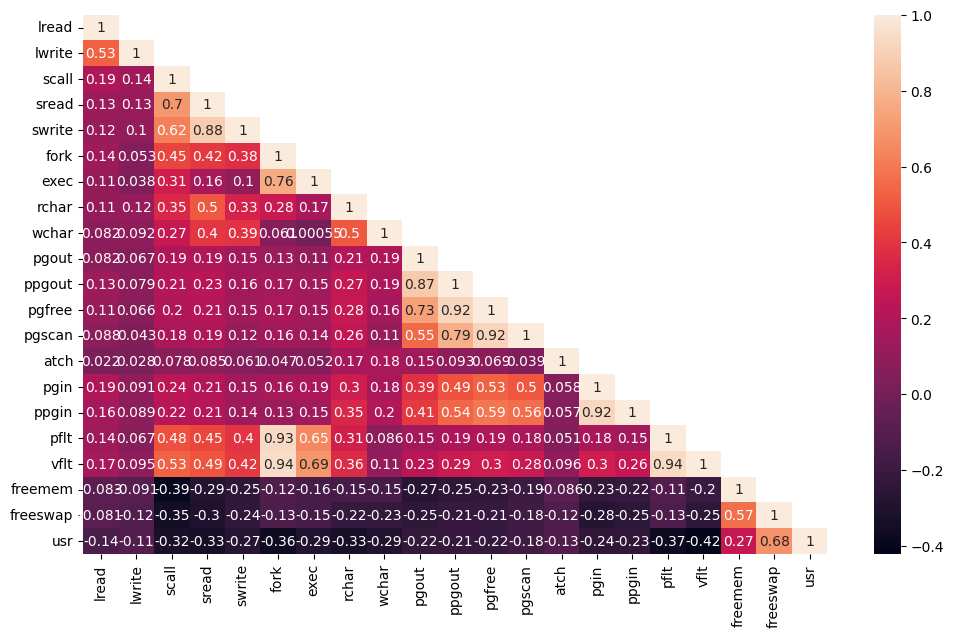

In [ ]:
#Multivariate Analysis
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True,mask=np.triu(df.corr(),+1));
plt.show()

In [ ]:
# Encoding independent variable
df= pd.get_dummies(df, columns=['runqsz'],drop_first=True)

In [ ]:
# To view the top 5 record using head function of the dataset
df.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt  freemem  freeswap  usr  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40     4670   1730946   95   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83     7278   1869002   97   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20      702   1021237   87   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80     7248   1863704   98   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60      633   1760253   90   

   runqsz_Not_CPU_Bound  
0                     0  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 22 columns]

In [7]:
#TRAIN-TEST SPLIT
# Creating a copy of the original data frame
data_ds= df.copy()


In [8]:
# Copy all the predictor variables into X dataframe
X= data_ds.drop('usr', axis=1)
# Copy target into the y dataframe.
y= data_ds[['usr']]

In [9]:
# To view the top 5 record using head function of the dataset
X.head()


lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgfree  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  \
0  ...     0.0     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound   
1  ...     0.0     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound   
2  ...     0.0     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound   
3  ...     0.0     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound   
4  ...     0.0     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound   

  freemem  freeswap  
0    4670   1730946  
1    7278   1869002  
2     702   1021237  
3    7248   1863704  
4     633   1760253  

[5 rows x 21 columns]

In [10]:
# Import the train_test_split library
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.30 , random_state=42)

In [11]:
#LINEAR REGRESSION MODEL
# Import the LinearRegression libary file
from sklearn.linear_model import LinearRegression

In [15]:
# invoke the LinearRegression function and find the bestfit model on training d
regression_model= LinearRegression()
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the linear regression model
regression_model = LinearRegression()

# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
  print("The coefficient for {} is {}".format(col_name, regression_model.coeffficient[idx]))




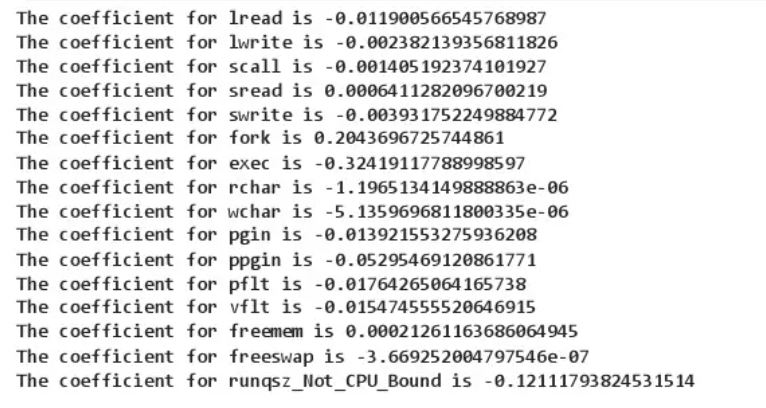

In [18]:
# R square on testing data
regression_model.score(X_test, y_test)


0.7817552563251355

In [ ]:
# Import the metrics library
from sklearn import metrics



In [ ]:
#RMSE on training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

4.223764847012626

In [ ]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

4.202461580650129


In [ ]:
#Calculate MSE on train
predicted_train=model.predict(X_train)
mse=metrics.mean_squared_error(y_train,predicted_train)

#RMSE on train
np.sqrt(mse)

4.223764847012626

In [ ]:
# Prediction on Test data
y_pred= model.predict(X_test)

#Calculate MSE on test
mse=metrics.mean_squared_error(y_test,y_pred)

#RMSE on test
np.sqrt(mse)

4.20246158065015


In [ ]:
# Plot the scatterplot for the y_test vs y_pred
plt.figure(figsize=(12,8))
plt.scatter(y_test, y_pred)
plt.title('y_test vs y_pred ',fontsize=14)
plt.show()

In [ ]:
# To calculate the predictive and residual
data_ds=y_test.copy()
data_ds['predictive']=y_pred
data_ds['residual']=data_ds['usr']-data_ds['predictive']
data_ds.head()

           usr           predictive          residual
  3894            95            95.252590         -0.252590

  4276      95            94.830537          0.169463

  3414      89            90.495571         -1.495571

  4165      80            79.370512          0.629488

  7385      79            81.698794         -2.698794           

In [ ]:
for i,j in np.array(model.params.reset_index()):
  print('({}) * {} +'.format(round(j,4),i),end=' ')



98.406 * const + (-0.0119) * lread + (-0.0024) * lwrite + (-0.0014) * scall + (0.006) * sread + (-0.0039) * swrite + 0.2044 * fork + (-0.3242) * exec + (-0.0) * rchar + (-0.0) * wchar + (-0.0139) * pgin + (-0.053) * ppgin + (-0.0176) *pflt + (-0.0155) * vflt + (0.0002) * freemem + (-0.0) * freeswap + (-0.1211) * runsqz_Not_CPU_Bound

In [21]:
#PROBLEM2
from google.colab import files


uploaded = files.upload()


Saving Contraceptive_method_dataset.xlsx to Contraceptive_method_dataset.xlsx


In [24]:
# Import the library file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression# Loading the data setcmd= pd.read_excel('Contraceptive_method_dataset.xlsx')
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

# Loading the data set
cmd= pd.read_excel('Contraceptive_method_dataset.xlsx')
cmd.head()


Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [25]:
cmd.tail()

Wife_age Wife_ education Husband_education  No_of_children_born  \
1468      33.0        Tertiary          Tertiary                  NaN   
1469      33.0        Tertiary          Tertiary                  NaN   
1470      39.0       Secondary         Secondary                  NaN   
1471      33.0       Secondary         Secondary                  NaN   
1472      17.0       Secondary         Secondary                  1.0   

     Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
1468   Scientology          Yes                   2                Very High   
1469   Scientology           No                   1                Very High   
1470   Scientology          Yes                   1                Very High   
1471   Scientology          Yes                   2                      Low   
1472   Scientology           No                   2                Very High   

     Media_exposure  Contraceptive_method_used  
1468         Exposed                       Yes  
1469         Exposed                       Yes  
1470         Exposed                       Yes  
1471         Exposed                       Yes  
1472         Exposed                       Yes

In [26]:
# To print number of rows and columns present in the dataset
print("no.of rows: ",cmd.shape[0], "no.of columns:",cmd.shape[1])

no.of rows:  1473 no.of columns: 10


In [27]:
cmd.shape

(1473, 10)

In [28]:
cmd.describe().T

count       mean       std   min   25%   50%   75%   max
Wife_age             1402.0  32.606277  8.274927  16.0  26.0  32.0  39.0  49.0
No_of_children_born  1452.0   3.254132  2.365212   0.0   1.0   3.0   4.0  16.0
Husband_Occupation   1473.0   2.137814  0.864857   1.0   1.0   2.0   3.0   4.0

In [29]:
cmd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [30]:
cmd.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [31]:
# To Check for duplicate values in the dataset
dups= cmd.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
cmd[dups]

Number of duplicate rows = 80


Wife_age Wife_ education Husband_education  No_of_children_born  \
79        38.0        Tertiary          Tertiary                  1.0   
167       26.0        Tertiary          Tertiary                  1.0   
224       47.0        Tertiary          Tertiary                  4.0   
270       30.0        Tertiary          Tertiary                  2.0   
299       26.0        Tertiary          Tertiary                  1.0   
...        ...             ...               ...                  ...   
1367      44.0        Tertiary          Tertiary                  5.0   
1387       NaN       Secondary          Tertiary                  2.0   
1423       NaN        Tertiary          Tertiary                  2.0   
1440       NaN        Tertiary          Tertiary                  1.0   
1447       NaN        Tertiary          Tertiary                  2.0   

        Wife_religion Wife_Working  Husband_Occupation  \
79        Scientology          Yes                   1   
167       Scientology           No                   1   
224       Scientology           No                   1   
270       Scientology           No                   1   
299       Scientology           No                   1   
...               ...          ...                 ...   
1367      Scientology          Yes                   1   
1387      Scientology          Yes                   2   
1423  Non-Scientology           No                   1   
1440  Non-Scientology          Yes                   2   
1447  Non-Scientology          Yes                   2   

     Standard_of_living_index Media_exposure  Contraceptive_method_used  
79                  Very High         Exposed                        No  
167                 Very High         Exposed                        No  
224                 Very High         Exposed                        No  
270                 Very High         Exposed                        No  
299                 Very High         Exposed                        No  
...                       ...             ...                       ...  
1367                Very High         Exposed                       Yes  
1387                Very High         Exposed                       Yes  
1423                Very High         Exposed                       Yes  
1440                Very High         Exposed                       Yes  
1447                Very High         Exposed                       Yes  

[80 rows x 10 columns]

In [32]:
# Removing the duplicate value
cmd.drop_duplicates(inplace=True)

In [33]:
# To Check for duplicate values after drop in the dataset
dups= cmd.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
cmd[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Wife_age, Wife_ education, Husband_education, No_of_children_born, Wife_religion, Wife_Working, Husband_Occupation, Standard_of_living_index, Media_exposure , Contraceptive_method_used]
Index: []

In [34]:
# To print number of rows and columns present in the dataset after removing the
print("no.of rows: ",cmd.shape[0], "no.of columns:",cmd.shape[1])

no.of rows:  1393 no.of columns: 10


In [35]:
cmd.describe().T

count       mean       std   min   25%   50%   75%   max
Wife_age             1326.0  32.557315  8.289259  16.0  26.0  32.0  39.0  49.0
No_of_children_born  1372.0   3.290816  2.399697   0.0   1.0   3.0   5.0  16.0
Husband_Occupation   1393.0   2.174444  0.854590   1.0   1.0   2.0   3.0   4.0

In [36]:
cmd.isnull().sum()

Wife_age                     67
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

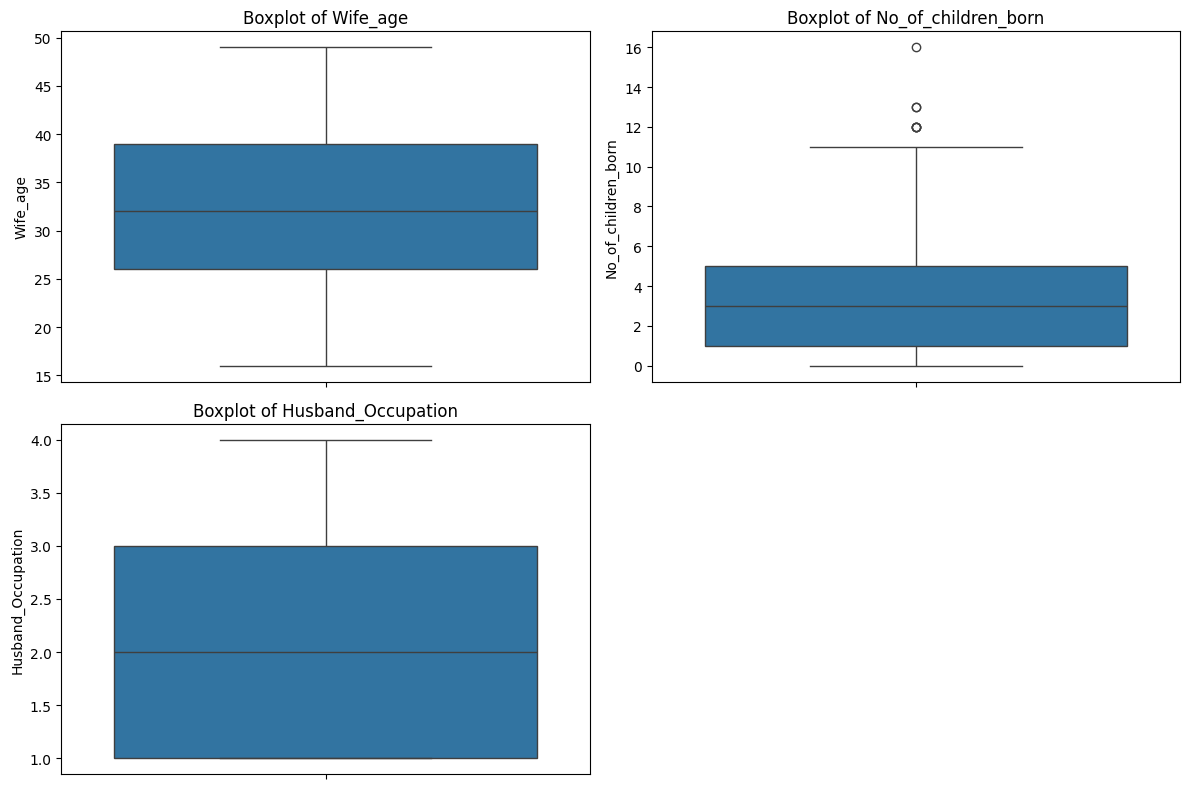

In [38]:
cmd_num= cmd.select_dtypes(include= ['float64', 'int64'])
# Check the presence of outliers in the each features
plt.figure(figsize=(12,8))
feature_list= cmd_num.columns
for i in range(len(feature_list)):
  plt.subplot(2, 2, i+1)

  sns.boxplot(y=cmd_num[feature_list[i]],data=cmd_num)
  plt.title('Boxplot of {}'.format(feature_list[i]))
  plt.tight_layout()


In [ ]:
# Define a function which results the upper and lower limit to detect outliersdef remove_outlier(col):
Q1,Q3=col.quantile([0.25,0.75])
IQR=Q3-Q1
lower_range= Q1-(1.5 * IQR)
upper_range= Q3+(1.5 * IQR)
return lower_range, upper_range

In [ ]:
# Cap & floor the values beyond the outlier boundariesfor iin feature_list:
LL,UL= remove_outlier(cmd_num[i])
cmd_num[i] = np.where(cmd_num[i] > UL,UL, cmd_num[i])
cmd_num[i] = np.where(cmd_num[i] < LL,LL, cmd_num[i])

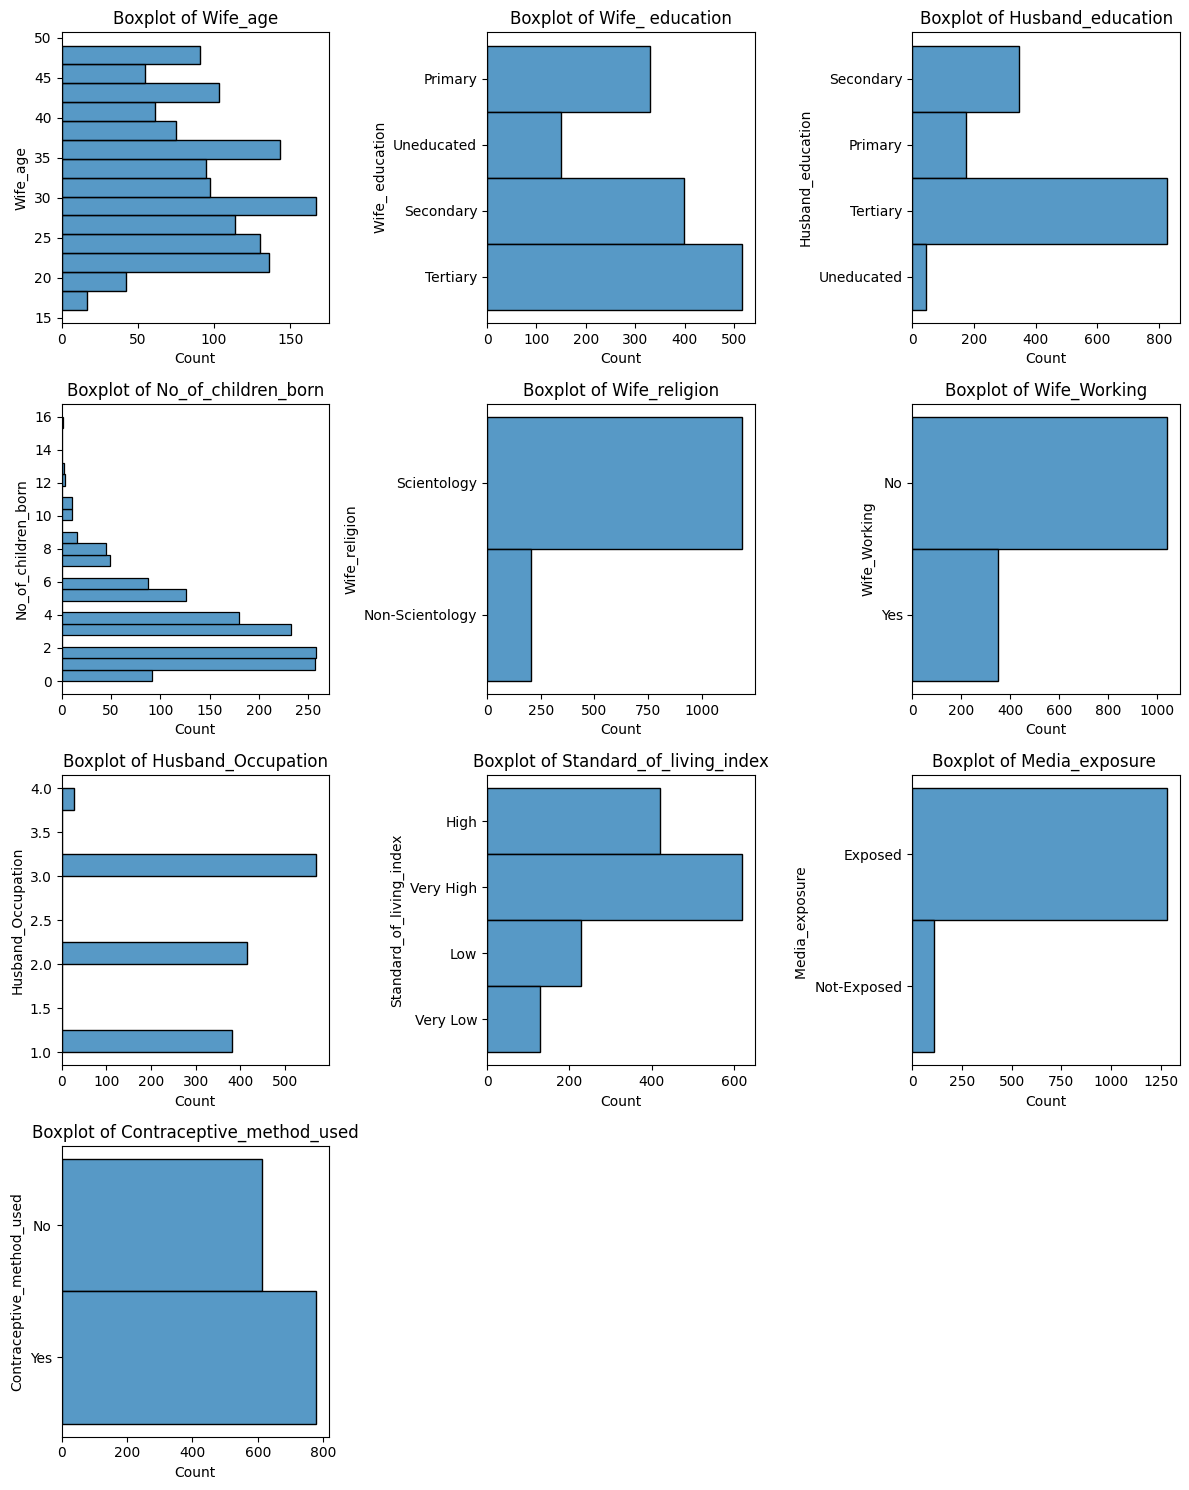

In [41]:
# Univariate Analysis
plt.figure(figsize=(12,15))
feature_list= cmd.columns
for i in range(len(feature_list)):
  plt.subplot(4, 3, i+1)
  sns.histplot(y=cmd[feature_list[i]],data=cmd)
  plt.title('Boxplot of {}'.format(feature_list[i]))
  plt.tight_layout()